# Hospital Management Data Analysis — Introduction

This analysis explores hospital operations, patient outcomes, and staff dynamics using data on patients, services, and staff schedules. It examines trends in patient satisfaction, bed occupancy, refusal rates, and staff availability, as well as the impact of events and seasonal patterns. The goal is to identify insights that can improve resource allocation, service quality, and patient care.

## loading library

In [1339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

## data reading

In [9]:
patients=pd.read_csv("D:\hospita_mangemant\patients.csv")
services_weekly=pd.read_csv("D:\hospita_mangemant\services_weekly.csv")
staff=pd.read_csv("D:\hospita_mangemant\staff.csv")
staff_schedule=pd.read_csv("D:\hospita_mangemant\staff_schedule.csv")

In [1306]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   patient_id                   1000 non-null   object         
 1   name                         1000 non-null   object         
 2   age                          1000 non-null   int64          
 3   arrival_date                 1000 non-null   object         
 4   departure_date               1000 non-null   object         
 5   service                      1000 non-null   object         
 6   satisfaction                 1000 non-null   int64          
 7   patient_time_stayed_by_days  1000 non-null   timedelta64[ns]
dtypes: int64(2), object(5), timedelta64[ns](1)
memory usage: 62.6+ KB


In [1308]:
services_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  208 non-null    int64  
 1   month                 208 non-null    int64  
 2   service               208 non-null    object 
 3   available_beds        208 non-null    int64  
 4   patients_request      208 non-null    int64  
 5   patients_admitted     208 non-null    int64  
 6   patients_refused      208 non-null    int64  
 7   patient_satisfaction  208 non-null    int64  
 8   staff_morale          208 non-null    int64  
 9   event                 208 non-null    object 
 10  bed_occ               208 non-null    float64
 11  patient_refusal_rate  208 non-null    float64
 12  month_name            208 non-null    object 
 13  season                208 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 22.9+ KB


In [1310]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


In [1312]:
staff_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6552 entries, 0 to 6551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        6552 non-null   int64 
 1   staff_id    6552 non-null   object
 2   staff_name  6552 non-null   object
 3   role        6552 non-null   object
 4   service     6552 non-null   object
 5   present     6552 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 307.3+ KB


# 1 📅 HOSPITAL WEEKLY STATS

Table: ['week', 'month', 'service', 'available_beds', 'patients_request', 'patients_admitted', 'patients_refused', 'patient_satisfaction', 'staff_morale', 'event']

How does staff morale correlate with patient satisfaction?

What is the bed occupancy rate by week and service?

Which services have the highest patient refusal rates, and why?

How do special events (e.g., epidemics, staff strikes) affect patient admissions and morale?

Is there a seasonal trend in the number of patient requests?

staff moral correlation with patient saatisfaction is 0.0083 wich is weak


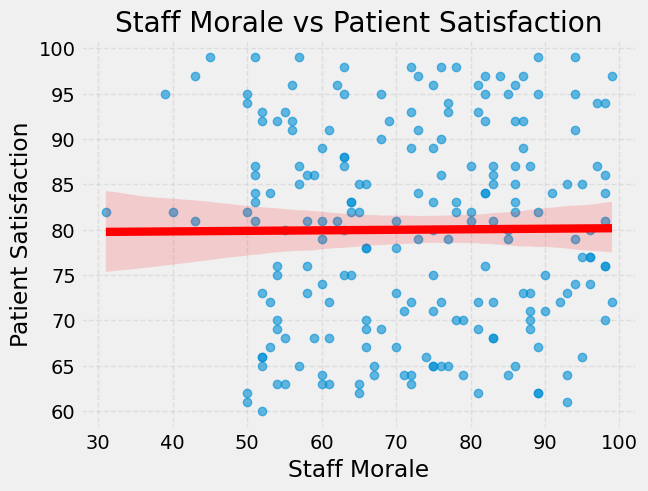

In [1341]:
# How does staff morale correlate with patient satisfaction?
staff_corr=services_weekly.staff_morale.corr(services_weekly.patient_satisfaction)
if staff_corr < .7 :
    print(f'staff moral correlation with patient saatisfaction is {staff_corr:.4f} wich is weak')
else : print(f'staff moral correlation with patient saatisfaction is {staff_corr:.4f} wich is high')

sns.regplot(x='staff_morale', y='patient_satisfaction', data=services_weekly, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Staff Morale vs Patient Satisfaction')
plt.xlabel('Staff Morale')
plt.ylabel('Patient Satisfaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

    week     bed_occ
0      1  100.000000
1      2   77.187500
2      3  100.000000
3      4  100.000000
4      5   89.772727
5      6   96.428571
6      7  100.000000
7      8   80.637255
8      9  100.000000
9     10   90.384615
10    11  100.000000
11    12   86.101974
12    13   92.647059
13    14   98.039216
14    15   94.642857
15    16   89.752252
16    17   89.375000
17    18   84.841523
18    19  100.000000
19    20  100.000000
20    21   93.750000
21    22   86.231884
22    23   92.647059
23    24   88.461538
24    25   93.750000
25    26   88.479263
26    27   87.356322
27    28   89.247312
28    29   96.527778
29    30   83.593750
30    31  100.000000
31    32   95.161290
32    33   95.833333
33    34   92.500000
34    35   81.334688
35    36   81.214689
36    37   95.689655
37    38   97.500000
38    39  100.000000
39    40   94.565217
40    41   98.809524
41    42   93.750000
42    43   83.166667
43    44   90.555556
44    45  100.000000
45    46   86.432927
46    47   96

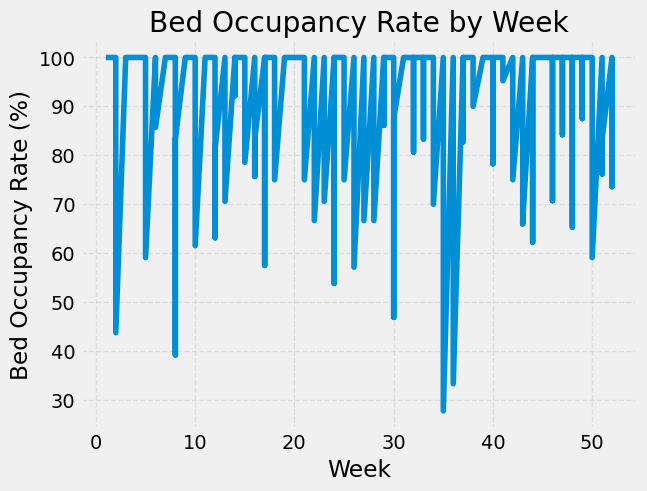

            service     bed_occ
0               ICU   84.381561
1         emergency  100.000000
2  general_medicine   97.313582
3           surgery   88.186759 



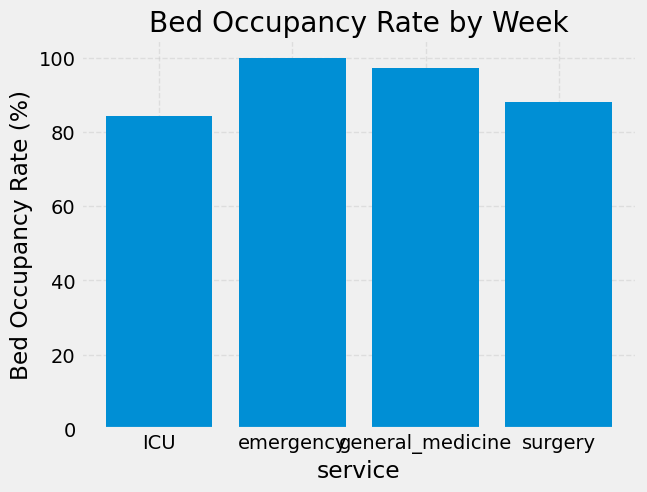

In [1343]:
# What is the bed occupancy rate by week and service?
services_weekly['bed_occ']=(services_weekly['patients_admitted'] / services_weekly['available_beds']) * 100

bed_occ_by_week=services_weekly.groupby('week')['bed_occ'].mean().reset_index()
print(bed_occ_by_week,'\n')

plt.plot(services_weekly['week'],services_weekly['bed_occ'])
plt.title('Bed Occupancy Rate by Week')
plt.xlabel('Week')
plt.ylabel('Bed Occupancy Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

service_occ_by_service=services_weekly.groupby('service')['bed_occ'].mean().reset_index()
print(service_occ_by_service,'\n')

plt.bar(service_occ_by_service['service'],service_occ_by_service['bed_occ'])
plt.title('Bed Occupancy Rate by Week')
plt.xlabel('service')
plt.ylabel('Bed Occupancy Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

            service  patient_refusal_rate
0         emergency             76.768903
1  general_medicine             34.621146
2           surgery             17.257776
3               ICU             11.661473 



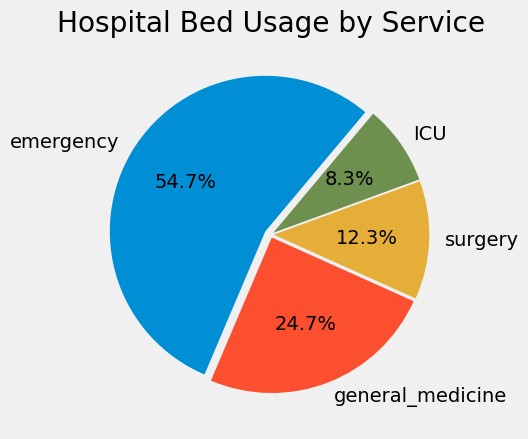

                  index  patient_refusal_rate
1      patients_request              0.756876
2          staff_morale              0.077070
3          staff_morale              0.077070
4  patient_satisfaction             -0.097037
5        available_beds             -0.136902 



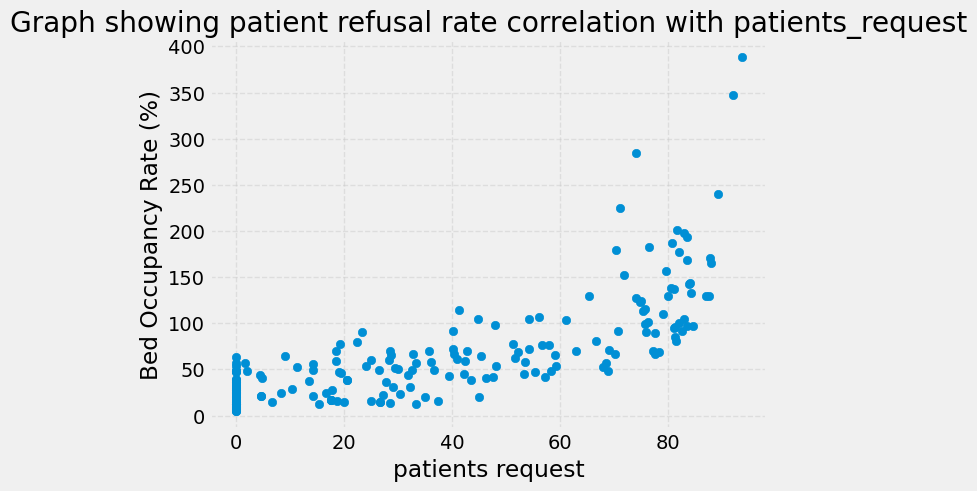

            service  patients_request  patient_refusal_rate
1         emergency        119.096154             76.768903
2  general_medicine         82.115385             34.621146
3           surgery         43.096154             17.257776
0               ICU         15.173077             11.661473 

In the Emergency service, high patient requests are the main reason for the high patient refusal rate.


In [1345]:
# Which services have the highest patient refusal rates, and why?
services_weekly['patient_refusal_rate']=services_weekly['patients_refused']/services_weekly['patients_request'] *100

patient_refusal_rate=services_weekly.groupby('service')['patient_refusal_rate'].mean().sort_values(ascending=False).reset_index()
print(patient_refusal_rate,'\n')

labels=list(patient_refusal_rate['service'])
values=list(patient_refusal_rate['patient_refusal_rate'])
plt.pie(values, labels=labels,autopct='%1.1f%%',startangle=50,explode=(0.04, 0.02, 0.02, 0.02))
plt.title('Hospital Bed Usage by Service')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

correlation_of_patient_ref_rt=services_weekly[['patient_refusal_rate', 'staff_morale', 'patient_satisfaction','available_beds','patients_request','staff_morale']].corr()['patient_refusal_rate'].sort_values(ascending=False).reset_index().iloc[1:]
print(correlation_of_patient_ref_rt,'\n')

plt.scatter(services_weekly['patient_refusal_rate'],services_weekly['patients_request'])
plt.title('Graph showing patient refusal rate correlation with patients_request')
plt.xlabel('patients request')
plt.ylabel('Bed Occupancy Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

correlation_of_patient_refuse_rate_by_service=services_weekly.groupby('service')[['patients_request','patient_refusal_rate']].mean().reset_index().sort_values(ascending=False,by='patient_refusal_rate')
print(correlation_of_patient_refuse_rate_by_service,'\n')
reason = "In the Emergency service, high patient requests are the main reason for the high patient refusal rate."
print(reason)

In [459]:
# How do special events (e.g., epidemics, staff strikes) affect patient admissions and morale?

summary_table_of_event_affection=services_weekly.groupby('event')[['patients_admitted','staff_morale']].mean().reset_index()
print(summary_table_of_event_affection,'\n')

      event  patients_admitted  staff_morale
0  donation          25.571429     80.142857
1       flu          35.105263     72.894737
2      none          27.823171     73.146341
3    strike          23.909091     53.727273 



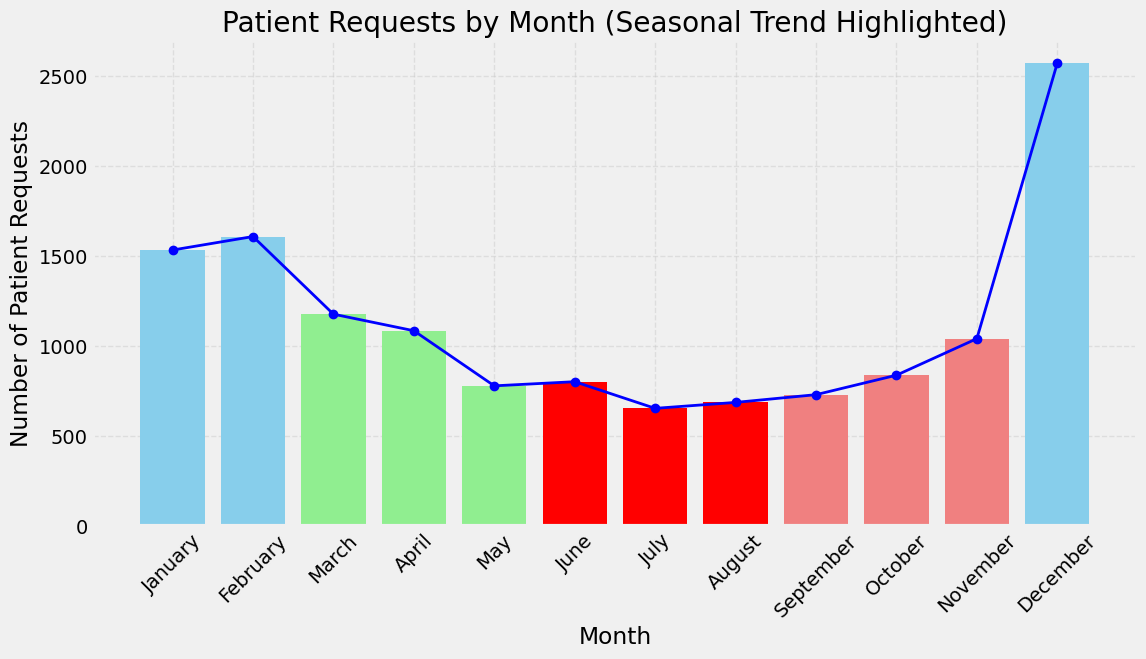

yes there is seasonality in the patients requests in Winter


In [1347]:
# Is there a seasonal trend in the number of patient requests?  seasonal_trand=

services_weekly['month_name']=services_weekly['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                                                            5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September'
                                                            , 10: 'October', 11: 'November', 12: 'December'})
services_weekly['season']=services_weekly['month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 
                                                         'Summer' if x in [6,7,8] else 'Autumn' if x in [9,10,11] else None)

seasonal_trend_in_pat_req=services_weekly.groupby(['month_name','month'])['patients_request'].sum().reset_index().sort_values(ascending=True,by='month')

seasons = {
    'Winter': ['December','January','February'],
    'Spring': ['March','April','May'],
    'Summer': ['June','July','August'],
    'Autumn': ['September','October','November']
}
colors = []
for month in seasonal_trend_in_pat_req['month_name']:
    if month in seasons['Winter']:
        colors.append('skyblue')
    elif month in seasons['Spring']:
        colors.append('lightgreen')
    elif month in seasons['Summer']:
        colors.append('red')
    else:
        colors.append('lightcoral')
plt.figure(figsize=(12,6))
plt.bar(seasonal_trend_in_pat_req['month_name'], seasonal_trend_in_pat_req['patients_request'], color=colors)
plt.plot(seasonal_trend_in_pat_req['month_name'], seasonal_trend_in_pat_req['patients_request'], color='blue', marker='o', linewidth=2)
plt.title('Patient Requests by Month (Seasonal Trend Highlighted)')
plt.xlabel('Month')
plt.ylabel('Number of Patient Requests')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()  
print('yes there is seasonality in the patients requests in Winter')

In [252]:
services_weekly

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event,bed_occ,patient_refusal_rate
0,1,1,emergency,32,76,32,44,67,70,none,100.000000,57.894737
1,1,1,surgery,45,130,45,85,83,78,flu,100.000000,65.384615
2,1,1,general_medicine,37,201,37,164,97,43,flu,100.000000,81.592040
3,1,1,ICU,22,31,22,9,84,91,flu,100.000000,29.032258
4,2,1,emergency,28,169,28,141,75,64,none,100.000000,83.431953
...,...,...,...,...,...,...,...,...,...,...,...,...
203,51,12,ICU,18,15,15,0,87,80,none,83.333333,0.000000
204,52,12,emergency,26,130,26,104,88,63,none,100.000000,80.000000
205,52,12,surgery,53,39,39,0,82,50,none,73.584906,0.000000
206,52,12,general_medicine,65,225,65,160,82,40,flu,100.000000,71.111111


# 2 🏥 PATIENT DATA ANALYSIS

Table: ['patient_id', 'name', 'age', 'arrival_date', 'departure_date', 'service', 'satisfaction']

What is the average length of stay for patients by service?

Is there any correlation between patient age and satisfaction score?

Which service has the highest average satisfaction rating?

What is the trend of patient admissions over time (monthly)?

What is the distribution of patient ages? Are there outliers?

In [553]:
#What is the average length of stay for patients by service?
patients['patient_time_stayed_by_days']=pd.to_datetime(patients['departure_date'])-pd.to_datetime(patients['arrival_date'])
avg_stay_by_service=patients.groupby('service')['patient_time_stayed_by_days'].mean()

for col,time in avg_stay_by_service.items():
    print(f'the average length of stay in the  {col.upper()} service is : {time}')

the average length of stay in the  ICU service is : 7 days 14:32:21.908713693
the average length of stay in the  EMERGENCY service is : 7 days 03:49:57.718631178
the average length of stay in the  GENERAL_MEDICINE service is : 6 days 23:54:02.975206611
the average length of stay in the  SURGERY service is : 7 days 20:47:14.645669291


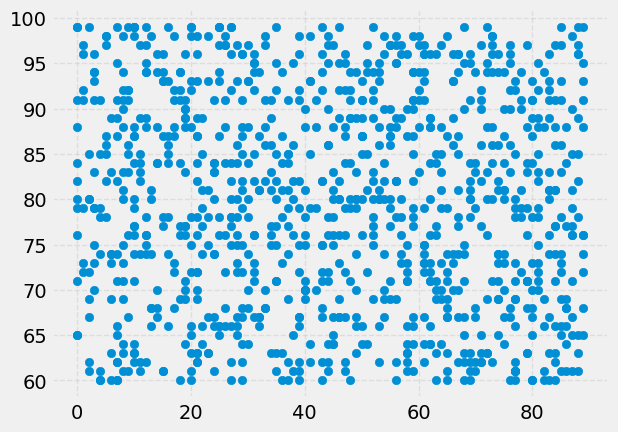

the correlation value is :-0.06 so there is weak correlation betwin age and satisfaction


In [1349]:
# Is there any correlation between patient age and satisfaction score?
corr_value_betwin_age_satis=patients[['age','satisfaction']].corr().loc['age','satisfaction']
plt.scatter(patients['age'],patients['satisfaction'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
if corr_value_betwin_age_satis < 0.7:
    print(f'the correlation value is :{corr_value_betwin_age_satis:.2f} so there is weak correlation betwin age and satisfaction')
else :print(f'the correlation value is :{corr_value_betwin_age_satis:.2f} so there is strong correlation betwin age and satisfaction')
    

In [604]:
#Which service has the highest average satisfaction rating?
avg_satisfation_by_service=patients.groupby('service')['satisfaction'].mean().sort_values(ascending=False).reset_index()
print(avg_satisfation_by_service,'\n')
print(f'the highest average satisfaction rating it in {avg_satisfation_by_service.loc[0,"service"].upper()} service')

            service  satisfaction
0           surgery     80.314961
1               ICU     79.921162
2         emergency     79.547529
3  general_medicine     78.574380 

the highest average satisfaction rating it in SURGERY service


    month month_name  patients_admitted
0       1    January                507
1       2   February                513
2       3      March                408
3       4      April                431
4       5        May                396
5       6       June                360
6       7       July                340
7       8     August                350
8       9  September                438
9      10    October                493
10     11   November                508
11     12   December               1107


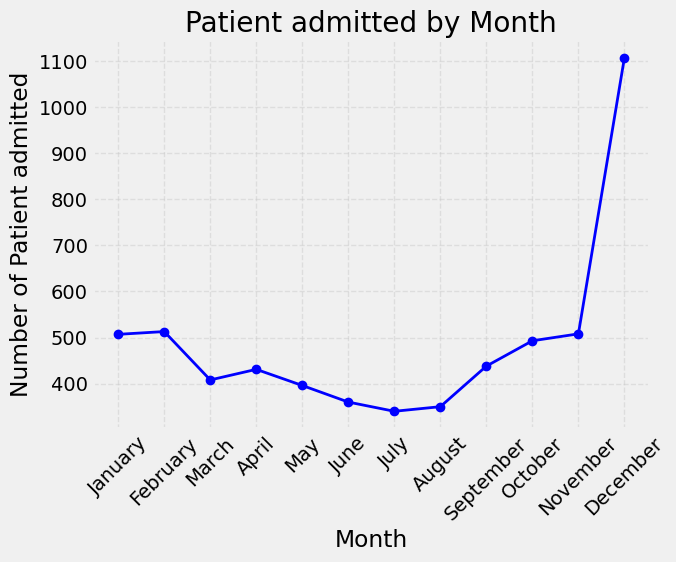

In [1351]:
#What is the What is the trend of patient admissions over time (monthly)? 
trend_patient_admissions_by_month=services_weekly.groupby(['month','month_name'])['patients_admitted'].sum().reset_index()
print(trend_patient_admissions_by_month)


plt.plot(trend_patient_admissions_by_month['month_name'], trend_patient_admissions_by_month['patients_admitted'], color='blue', marker='o', linewidth=2)
plt.title('Patient admitted by Month')
plt.xlabel('Month')
plt.ylabel('Number of Patient admitted')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()  

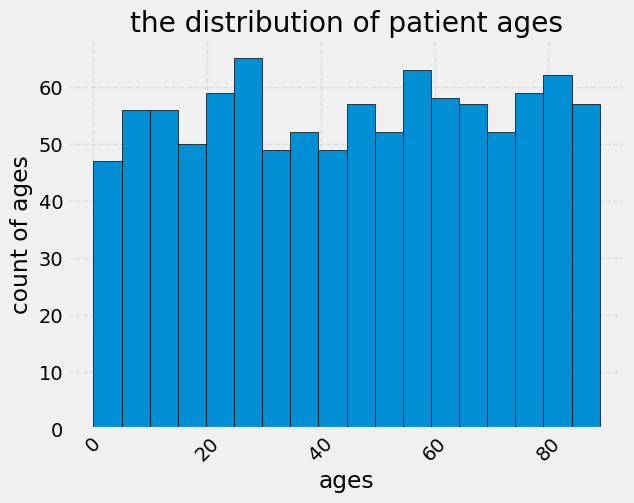

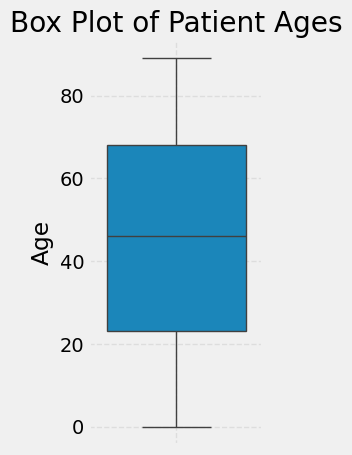

As we see in the box plot there is no outliers


In [1353]:
# What is the distribution of patient ages? Are there outliers?
bins=round((patients.age.max() - patients.age.min())/5)


plt.hist(patients.age,bins=bins,edgecolor='black')
plt.title('the distribution of patient ages')
plt.xlabel('ages')
plt.ylabel('count of ages')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()  

plt.figure(figsize=(2,5))
sns.boxplot(patients.age,vert=True, patch_artist=True)
plt.title('Box Plot of Patient Ages')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print('As we see in the box plot there is no outliers')

# 3 👩‍⚕️ STAFF DATA

Table: ['staff_id', 'staff_name', 'role', 'service']

How many staff are assigned to each service?

What is the distribution of roles (e.g., doctors, nurses, admin)?

Which services have the highest staff-to-patient ratio?

In [712]:
# How many staff are assigned to each service?
staff_count_in_service=staff.groupby('service')['staff_id'].count()
for col ,count in staff_count_in_service.items():
    print(f'number of staff assigned in {col.upper()} service is {count}')

number of staff assigned in ICU service is 32
number of staff assigned in EMERGENCY service is 29
number of staff assigned in GENERAL_MEDICINE service is 27
number of staff assigned in SURGERY service is 22


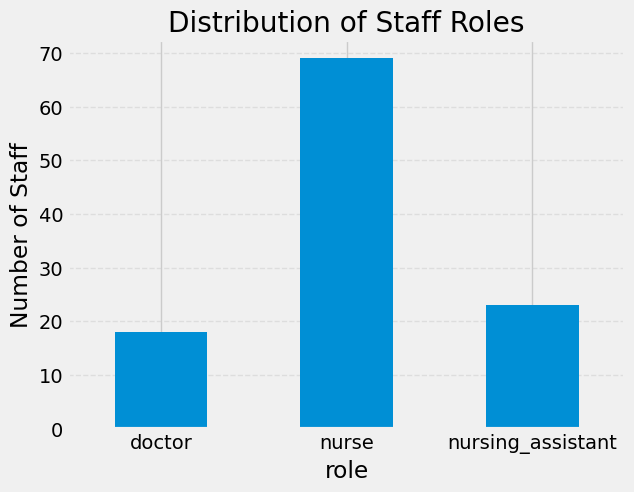

In [1355]:
#What is the distribution of roles (e.g., doctors, nurses, admin)?
staff.groupby('role').size().plot(kind='bar')
plt.title('Distribution of Staff Roles')
plt.ylabel('Number of Staff')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [852]:
# Which services have the highest staff-to-patient ratio?
staff_to_patient=pd.merge(staff,patients,on='service')

high_ratio_data=staff_to_patient.groupby('service')[['staff_id','patient_id']].nunique().reset_index()
high_ratio_data['ratio']=high_ratio_data['staff_id'] / high_ratio_data['patient_id']

highest_on_service=high_ratio_data.sort_values(ascending=True,by='ratio').loc[0,'service']

print(f'service with the highest ratio staff-to-patient is {highest_on_service}' )

service with the highest ratio staff-to-patient is ICU


In [764]:
staff_to_patient.head()

,staff_id,staff_name,role,service,patient_id,name,age,arrival_date,departure_date,satisfaction,patient_time_stayed_by_days
0,STF-5ca26577,Allison Hill,doctor,emergency,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,81,11 days
1,STF-5ca26577,Allison Hill,doctor,emergency,PAT-f4b29bae,Diana May,83,2025-06-26,2025-06-30,81,4 days
2,STF-5ca26577,Allison Hill,doctor,emergency,PAT-283cda07,William Herrera,62,2025-12-26,2025-12-27,66,1 days
3,STF-5ca26577,Allison Hill,doctor,emergency,PAT-5290be70,Jeffrey Chandler,29,2025-11-01,2025-11-14,88,13 days
4,STF-5ca26577,Allison Hill,doctor,emergency,PAT-95afe21e,Michelle Harmon,7,2025-02-24,2025-03-03,62,7 days


Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction', 'patient_time_stayed_by_days'],
      dtype='object')
Index(['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event', 'bed_occ', 'patient_refusal_rate',
       'month_name', 'season'],
      dtype='object')
Index(['staff_id', 'staff_name', 'role', 'service'], dtype='object')
Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')


# 4 📆 STAFF ATTENDANCE DATA

Table: ['week', 'staff_id', 'staff_name', 'role', 'service', 'present']

What is the average staff attendance rate per week and per service?

Which staff members have the lowest attendance, and what’s their role?

Is there a relationship between staff presence and patient satisfaction or morale?

Does staff attendance decrease during high-event weeks (e.g., epidemics)?

Is there a link between services with high patient refusal rates and low staff availability?

* average staff attendance rate per week : 
 ---------------------------------------
     week    present
0      1  92.063492
1      2  91.269841
2      3   0.000000
3      4  84.920635
4      5  85.714286
5      6   0.000000
6      7  91.269841
7      8  86.507937
8      9   0.000000
9     10  88.888889
10    11  87.301587
11    12   0.000000
12    13  84.920635
13    14  82.539683
14    15   0.000000
15    16  89.682540
16    17  87.301587
17    18   0.000000
18    19  93.650794
19    20  91.269841
20    21   0.000000
21    22  91.269841
22    23  92.857143
23    24   0.000000
24    25  88.095238
25    26  94.444444
26    27   0.000000
27    28  92.063492
28    29  91.269841
29    30   0.000000
30    31  85.714286
31    32  88.095238
32    33   0.000000
33    34  88.888889
34    35  86.507937
35    36   0.000000
36    37  88.095238
37    38  92.063492
38    39   0.000000
39    40  87.301587
40    41  93.650794
41    42   0.000000
42    43  88.888889
43    44  88.888889
44    45   0.0

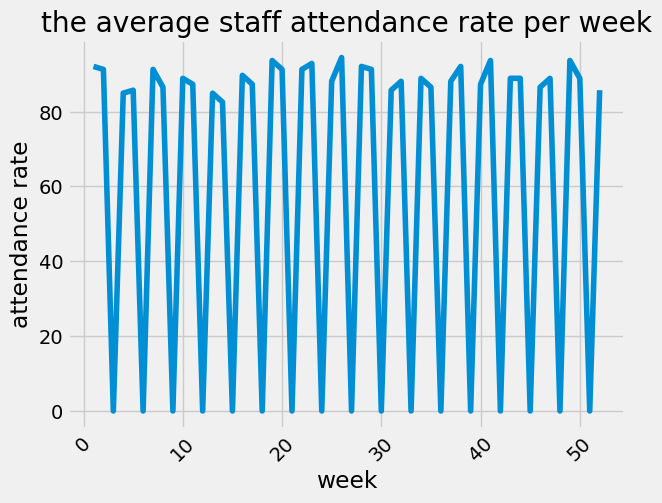

* average staff attendance rate per service :
 ---------------------------------------
            service    present
0               ICU  60.124434
1         emergency  60.404339
2  general_medicine  58.997253
3           surgery  60.230769


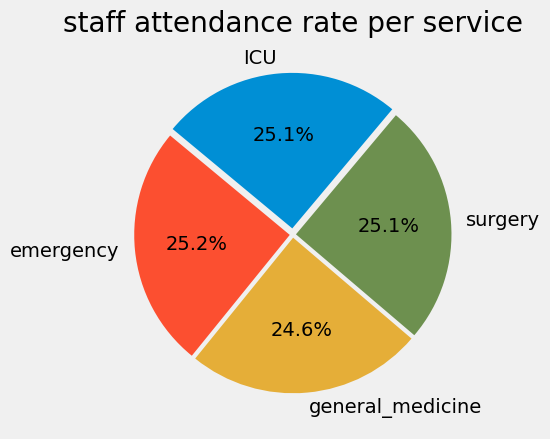

In [1357]:
# What is the average staff attendance rate per week and per service?

avg_attendence_by_week=(staff_schedule.groupby('week')['present'].mean()*100).reset_index()
print(f'* average staff attendance rate per week : \n ---------------------------------------\n {avg_attendence_by_week}')
plt.plot(avg_attendence_by_week['week'],avg_attendence_by_week['present'])
plt.title('the average staff attendance rate per week')
plt.xlabel('week')
plt.ylabel('attendance rate')
plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.5)
plt.show()  
avg_attendence_by_service=(staff_schedule.groupby('service')['present'].mean()*100).reset_index()

print(f'* average staff attendance rate per service :\n ---------------------------------------\n{avg_attendence_by_service}')

labels=list(avg_attendence_by_service['service'])
values=list(avg_attendence_by_service['present'])
plt.pie(values, labels=labels,autopct='%1.1f%%',startangle=50,explode=(0.04, 0.02, 0.02, 0.02))
plt.title('staff attendance rate per service')
plt.show()

In [1221]:
# Which staff members have the lowest attendance, and what’s their role?
v=staff_schedule.groupby('staff_name')[['present','role']].agg({'present': 'sum','role': 'unique'}).reset_index()
min_attendence=v['present'].min()
print('the staff members with lowest attendence are :')
for name,count in v.iterrows():
    if count.present == min_attendence:
        print(f'{count.staff_name} with {count.present} attendence in role {count.role[0].upper()}')

the staff members with lowest attendence are :
Amber Kidd with 28 attendence in role DOCTOR
Angela Lopez with 28 attendence in role NURSE
Noah Rhodes with 28 attendence in role DOCTOR


In [1270]:
# Is there a relationship between staff presence and patient satisfaction ?
data_merged_p_s=pd.merge(staff_schedule,patients,on='service')
present_satisafaction_corr=pd.merge(staff_schedule,patients,on='service').groupby('present')['satisfaction'].mean().reset_index()
present_satisafaction_corr

corr_value_present_satisf=data_merged_p_s['present'].corr(data_merged_p_s['satisfaction'])

if corr_value_present_satisf < 0.7:
    print(f'the correlation value is :{corr_value_betwin_age_satis:.2f} so there is weak correlation betwin present and satisfaction')
else :print(f'the correlation value is :{corr_value_betwin_age_satis:.2f} so there is strong correlation betwin present and satisfaction')

the correlation value is :-0.06 so there is weak correlation betwin present and satisfaction


In [1333]:
# Is there a link between services with high patient refusal rates and low staff availability?
staff_availability = (staff_schedule.groupby('service')['present'].mean()*100).reset_index().rename(columns={'present': 'staff_availability'})

merged = pd.merge(services_weekly, staff_availability, on='service')
corr = merged['patient_refusal_rate'].corr(merged['staff_availability'])
if corr < 0.7:
    print(f'the correlation value is :{corr:.2f} so there is weak correlation betwin patient refusal rate and staff availability')
else :print(f'the correlation value is :{corr:.2f} so there is strong correlation betwin patient refusal_rate and staff availability')

the correlation value is :0.15 so there is weak correlation betwin patient refusal rate and staff availability
